### **AGE AND GENDER PREDICTION USING DEEP LEARNING ⚙️**

#### KUSH OZA
#### D2 42
#### DL LAB PROJECT

In [1]:
# General
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data
import plotly.express as px
import matplotlib.pyplot as plt

# Data Preprocessing
import tensorflow.data as tfds
from sklearn.model_selection import train_test_split

2024-04-07 18:30:58.041550: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 18:30:58.041667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 18:30:58.157615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Setting constants for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Constants
BATCH_SIZE = 16
IMAGE_SIZE = 224

## EDA ON THE DATASET

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Initialize the directory path
dir_path = "/kaggle/input/utkface-new/UTKFace/"
image_paths = os.listdir(dir_path)

# Initialize a Gender Mapping
gender_mapping = ["Male", "Female"]

In [4]:
# Choose and load an image randomly
rand_image_path = np.random.choice(image_paths)
rand_image = plt.imread(dir_path + rand_image_path) / 255.
sample_age, sample_gender, *_ = rand_image_path.split("_")

In [5]:
print("Total number of images:", len(image_paths))
print("Sample Image path:", rand_image_path)
print("Sample Age:", sample_age)
print("Sample Gender:", gender_mapping[int(sample_gender)])

Total number of images: 23708
Sample Image path: 1_0_3_20161220222642427.jpg.chip.jpg
Sample Age: 1
Sample Gender: Male


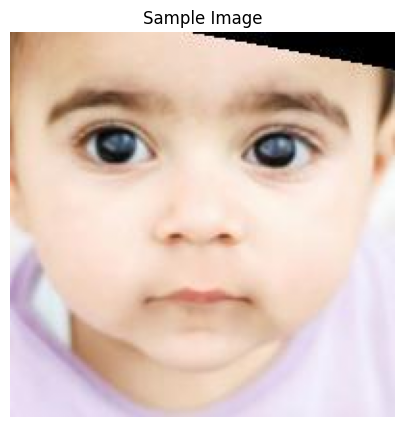

In [6]:
# Show the image
plt.figure(figsize=(5, 5))
plt.title("Sample Image")
plt.imshow(rand_image)
plt.axis("off")
plt.show()

In [7]:
# Initialize a male counter.
male_count = 0
ages = []

# Male counts
for path in image_paths:
    path_split = path.split("_")
    if "0" == path_split[1]:
        male_count += 1
    ages.append(int(path_split[0]))

# Count total female counts
female_count = len(image_paths) - male_count

In [8]:
print(len(ages))

23708


In [9]:
import seaborn as sns

/tmp/ipykernel_34/2794015913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ages)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

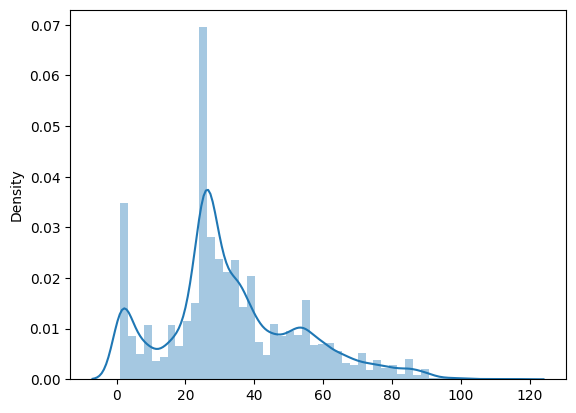

In [10]:
sns.distplot(ages)

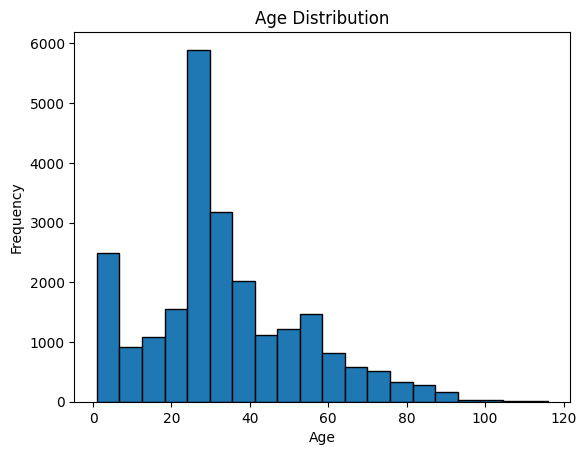

In [11]:
# Histogram of age
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [12]:
import plotly.express as px
pie_chart = px.pie(
    names = gender_mapping,
    values = [male_count, female_count],
    title = "Gender Distribution Pie Chart",
    height = 500
)
pie_chart.show()

In [13]:
# Shuffle the images
np.random.shuffle(image_paths)

# Split data into training, validation, and testing sets
train_images, test_images = train_test_split(
    image_paths,
    train_size=0.9, 
    test_size=0.1,   
)

train_images, valid_images = train_test_split(
    image_paths,
    train_size = 0.9,
    test_size = 0.1
)

In [14]:
print(f"Training Size : {len(valid_images)}")

Training Size : 2371


In [15]:
print(f"Training Size : {len(train_images)}")
print(f"Testing Size  : {len(test_images)}")

Training Size : 21337
Testing Size  : 2371


In [16]:
# Extract age and gender
train_ages = [int(path.split("_")[0]) for path in train_images]
train_genders = [int(path.split("_")[1]) for path in train_images]

In [17]:
valid_ages = [int(path.split("_")[0]) for path in valid_images]
valid_genders = [int(path.split("_")[1]) for path in valid_images]

In [18]:
test_ages = [int(path.split("_")[0]) for path in test_images]
test_genders = [int(path.split("_")[1]) for path in test_images]

In [19]:
def preprocess_age_data(image_path, age, gender, dir_path=dir_path, IMAGE_SIZE = IMAGE_SIZE):
    # Load the Image
    image = tf.io.read_file(dir_path + image_path)
    image = tf.io.decode_jpeg(image)

    # Resize and Normalize the Image
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = image / 255
    image = tf.cast(image, tf.float32)

    return image, age

In [20]:
# Obtain training, testing and validation datasets
train_ds = tfds.Dataset.from_tensor_slices((train_images, train_ages, train_genders)).shuffle(2000)
train_age_ds = train_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

In [21]:
valid_ds = tfds.Dataset.from_tensor_slices((valid_images, valid_ages, valid_genders)).shuffle(2000)
valid_age_ds = valid_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

In [22]:
test_ds  = tfds.Dataset.from_tensor_slices((test_images, test_ages, test_genders)).shuffle(500)
test_age_ds = test_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

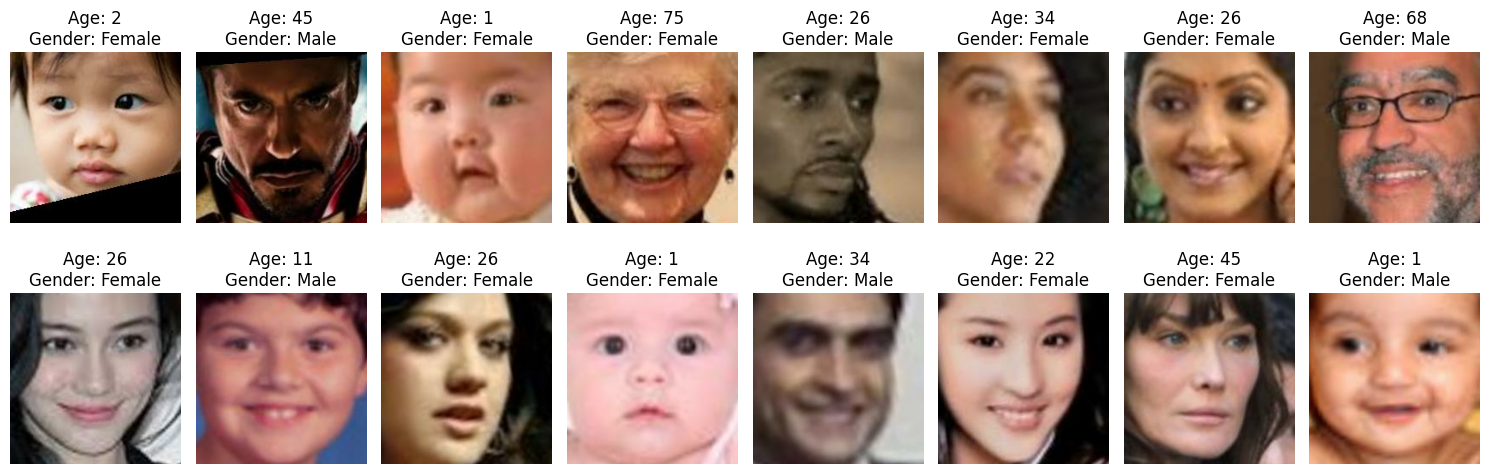

In [23]:
plt.figure(figsize=(15, 10))
for images, ages, genders in train_ds.batch(BATCH_SIZE).take(1):

    for index in range(len(images)):
        image = tf.io.read_file(dir_path + images[index])
        image = tf.io.decode_jpeg(image)
        plt.subplot(4, 8, index + 1)
        plt.imshow(image)
        plt.title(f"Age: {ages[index]}\nGender: {gender_mapping[genders[index]]}")
        plt.axis("off")

plt.tight_layout()
plt.show()

## EFFICIENT NETWORK FOR GENDER DETECTION

In [24]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [25]:
efficient_net = EfficientNetB0(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False,
    pooling='max'
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [26]:
model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 120, activation='relu'))
model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 1, activation='relu'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

In [28]:
history = model.fit(
    train_age_ds,
    validation_data=valid_age_ds,
    epochs=10,
    batch_size=BATCH_SIZE
)

Epoch 1/10
   1/1334 ━━━━━━━━━━━━━━━━━━━━ 36:27:28 98s/step - loss: 1780.1699 - mae: 33.1751

I0000 00:00:1712514780.634951      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712514780.752578      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 234.6029 - mae: 11.0868

W0000 00:00:1712514937.528629      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 267s 127ms/step - loss: 234.5374 - mae: 11.0851 - val_loss: 66.6420 - val_mae: 5.9661
Epoch 2/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 96s 72ms/step - loss: 82.8208 - mae: 6.6291 - val_loss: 59.0355 - val_mae: 5.4964
Epoch 3/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 97s 73ms/step - loss: 56.5215 - mae: 5.4931 - val_loss: 58.6034 - val_mae: 5.4618
Epoch 4/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 97s 73ms/step - loss: 46.2758 - mae: 4.9645 - val_loss: 57.5488 - val_mae: 5.4305
Epoch 5/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 97s 73ms/step - loss: 35.8011 - mae: 4.4213 - val_loss: 52.3032 - val_mae: 5.0922
Epoch 6/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 98s 73ms/step - loss: 29.1552 - mae: 4.0004 - val_loss: 55.9756 - val_mae: 5.3991
Epoch 7/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 97s 73ms/step - loss: 24.5322 - mae: 3.6816 - val_loss: 52.6231 - val_mae: 5.1152
Epoch 8/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 97s 73ms/step - loss: 21.6536 - mae: 3.4505 - val_loss: 54.4625 - val_mae: 5.1410
Epoch 9/10
1334

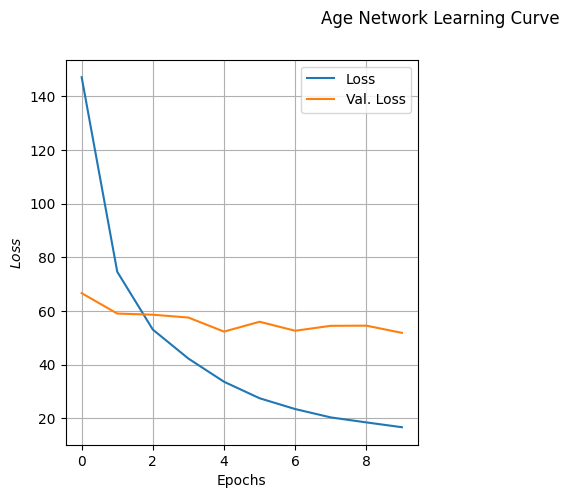

In [30]:
# Converting history into data frame.
age_his_df = pd.DataFrame(history.history)

# Visualization
plt.figure(figsize=(10, 5 ))
plt.subplot(1,2,1)
plt.suptitle("Age Network Learning Curve")
plt.plot(age_his_df['loss'], label="Loss")
plt.plot(age_his_df['val_loss'], label="Val. Loss")
plt.xlabel("Epochs")
plt.ylabel("$Loss$")
plt.grid()
plt.legend()

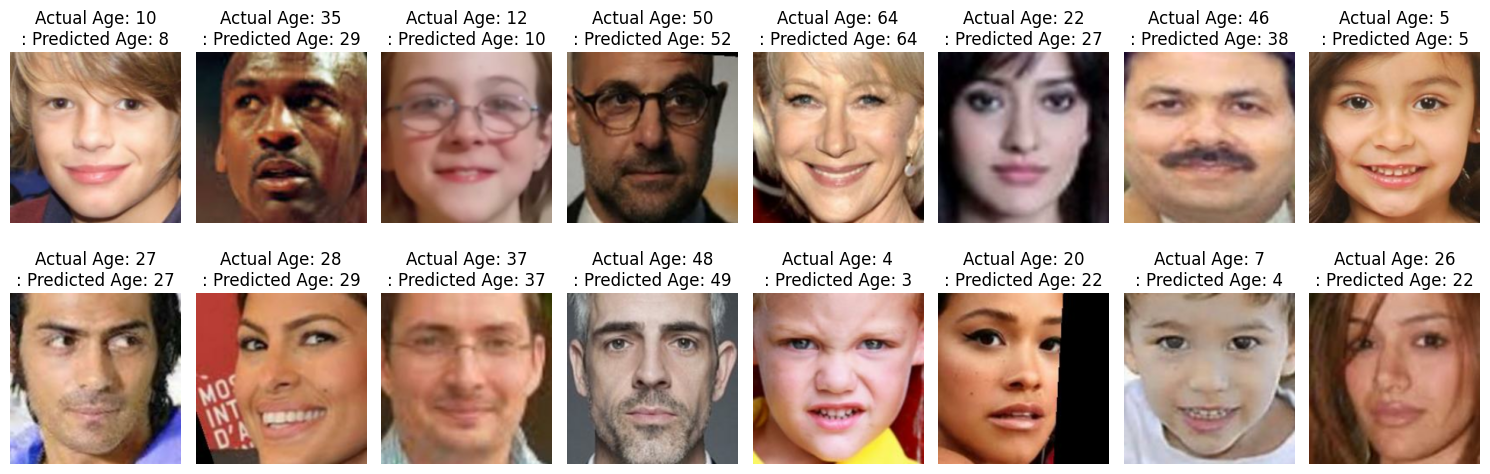

In [39]:
plt.figure(figsize=(15, 10))
for images, ages, genders in test_ds.batch(BATCH_SIZE).take(5):
    for index in range(len(images)):

        # Image Processing
        image = tf.io.read_file(dir_path + images[index])
        image = tf.io.decode_jpeg(image)
        image = tf.cast(image, tf.float32)
        image = image/255
        image = tf.image.resize(image, [224,224])
        image = tf.reshape(image, [-1,224,224,3])
        
        # Predictions
        pred_age =tf.squeeze(model.predict(image, verbose=0))

        # Visualization
        plt.subplot(4, 8, index + 1)
        plt.imshow(image[0])
        plt.title(f"Actual Age: {ages[index]}\n: Predicted Age: {int(pred_age)}")
        plt.axis("off")
plt.tight_layout()
plt.show()